In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import regularizers
from IPython.display import Image
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, RandomContrast, Rescaling
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall

In [2]:
! unzip /content/drive/MyDrive/Combined_Dataset.zip
dataset_dir = "/content/content/AIRecognition"

Streaming output truncated to the last 5000 lines.
  inflating: content/AIRecognition/fake/fake-v2/13943.png  
  inflating: content/AIRecognition/fake/fake-v2/2587.jpg  
  inflating: content/AIRecognition/fake/fake-v2/11963.jpg  
  inflating: content/AIRecognition/fake/fake-v2/20878.png  
  inflating: content/AIRecognition/fake/fake-v2/13839.png  
  inflating: content/AIRecognition/fake/fake-v2/19956.png  
  inflating: content/AIRecognition/fake/fake-v2/22093.png  
  inflating: content/AIRecognition/fake/fake-v2/2704.jpg  
  inflating: content/AIRecognition/fake/fake-v2/16898.png  
  inflating: content/AIRecognition/fake/fake-v2/20703.png  
  inflating: content/AIRecognition/fake/fake-v2/23931.png  
  inflating: content/AIRecognition/fake/fake-v2/17039.png  
  inflating: content/AIRecognition/fake/fake-v2/2647.jpg  
  inflating: content/AIRecognition/fake/fake-v2/24691.png  
  inflating: content/AIRecognition/fake/fake-v2/19245.png  
  inflating: content/AIRecognition/fake/fake-v2/1372

In [7]:
img_height = 224
img_width = 224
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  shuffle=True,
  subset="training",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.2,
  subset="validation",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    RandomRotation(0.2),  # Randomly rotate images by 20%
    RandomZoom(0.2),  # Randomly zoom into images
    RandomContrast(0.2),  # Randomly adjust contrast
])

augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

class_names = train_ds.class_names

Found 27548 files belonging to 2 classes.
Using 22039 files for training.
Found 27548 files belonging to 2 classes.
Using 5509 files for validation.


In [9]:
inputs = Input(shape=(img_height, img_width, 3))
x = Conv2D(64, (3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=Adamax(learning_rate=1e-3),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', Precision(), Recall()])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 128)     512 

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

model_history = model.fit(
  augmented_train_ds,
  validation_data=val_ds,
  epochs=100,
  callbacks=[early_stopping],
  verbose = 1
)

Epoch 1/100
689/689 [==============================] - 471s 660ms/step - loss: 1.4678 - accuracy: 0.7762 - precision_1: 0.7043 - recall_1: 0.6278 - val_loss: 0.3788 - val_accuracy: 0.8600 - val_precision_1: 0.8795 - val_recall_1: 0.7004
Epoch 2/100
689/689 [==============================] - 453s 653ms/step - loss: 0.4051 - accuracy: 0.8395 - precision_1: 0.8159 - recall_1: 0.7025 - val_loss: 0.3448 - val_accuracy: 0.8575 - val_precision_1: 0.7969 - val_recall_1: 0.8014
Epoch 3/100
689/689 [==============================] - 440s 631ms/step - loss: 0.3456 - accuracy: 0.8604 - precision_1: 0.8436 - recall_1: 0.7409 - val_loss: 0.4157 - val_accuracy: 0.8457 - val_precision_1: 0.9290 - val_recall_1: 0.6106
Epoch 4/100
689/689 [==============================] - 448s 644ms/step - loss: 0.3040 - accuracy: 0.8783 - precision_1: 0.8615 - recall_1: 0.7795 - val_loss: 0.3133 - val_accuracy: 0.8717 - val_precision_1: 0.8644 - val_recall_1: 0.7558
Epoch 5/100
689/689 [==============================]

In [11]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(val_ds)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

model.save('Custom_BatchNorm')

173/173 [==============================] - 77s 427ms/step - loss: 0.2622 - accuracy: 0.9002 - precision_1: 0.8499 - recall_1: 0.8717
Val Loss: 0.2622
Val Accuracy: 0.9002
Val Precision: 0.8499
Val Recall: 0.8717


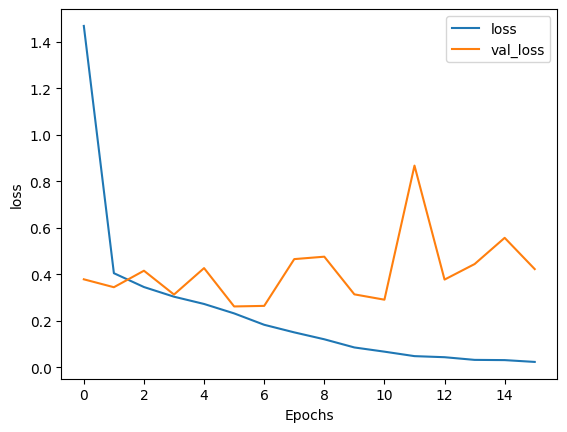

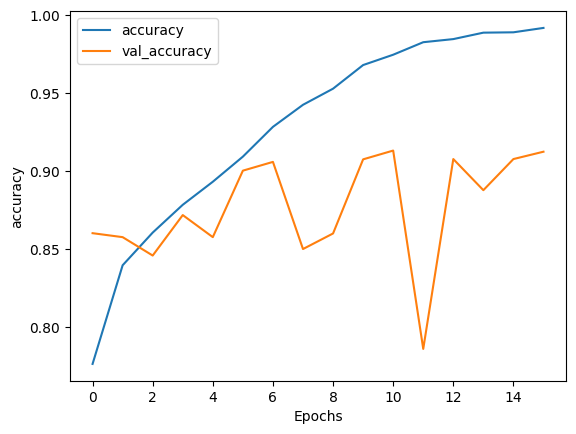

KeyError: 'precision'

In [13]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric], label = metric)
    plt.plot(history.history['val_' + metric], label='val_' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_metrics(model_history, 'loss')
plot_metrics(model_history, 'accuracy')